#### LangChain vs LangGraph (feat. LangGraph 개념 설명)
* LangGraph의 개념과 주요 기능을 이해하고, 차이점을 비교합니다.

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
print(OPENAI_API_KEY[:2])

UPSTAGE_API_KEY = os.getenv("UPSTAGE_API_KEY")
print(UPSTAGE_API_KEY[30:])

In [2]:
# from langchain_openai import ChatOpenAI

# llm = ChatOpenAI(model='gpt-4o-mini') # 테스트의 경우에는 작은 모델을 사용합니다

from langchain_upstage import ChatUpstage
llm = ChatUpstage(
        model="solar-pro",
        base_url="https://api.upstage.ai/v1",
        temperature=0.5
    )
print(llm)

query = 'LangGraph는 무엇인가요?'
llm.invoke(query)



c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\mylangchain-app-SBe-Yh6W-py3.12\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


client=<openai.resources.chat.completions.completions.Completions object at 0x00000233E513AB70> async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x00000233E73A2F90> model_name='solar-pro' temperature=0.5 model_kwargs={} upstage_api_key=SecretStr('**********') upstage_api_base='https://api.upstage.ai/v1'


AIMessage(content='**LangGraph**는 언어 모델(Language Model, LM)을 활용해 복잡한 대화 흐름이나 상태 기반 애플리케이션을 구축할 수 있도록 설계된 오픈소스 프레임워크입니다. 주로 **LLM(Large Language Model)과 상태 머신(State Machine) 개념을 결합**하여, 다단계 대화, 작업 자동화, 챗봇, 에이전트 시스템 등을 효율적으로 개발할 수 있게 해줍니다.\n\n### 주요 특징:\n1. **상태 관리**  \n   - 대화나 작업 과정에서 **상태(State)를 추적**할 수 있어, 이전 컨텍스트를 유지하며 복잡한 흐름을 제어합니다.\n   - 예: 사용자 인증 → 주문 확인 → 결제 처리 같은 다단계 프로세스.\n\n2. **그래프 기반 아키텍처**  \n   - 노드(Node)와 엣지(Edge)로 구성된 **유한 상태 머신(Finite State Machine)** 또는 **다이내믹 그래프**를 사용해 흐름을 시각화합니다.\n   - 각 노드는 LLM 호출, 외부 API 통합, 조건 분기 등의 작업을 수행할 수 있습니다.\n\n3. **LLM 통합**  \n   - LangChain, Llamaindex 등 다른 LLM 프레임워크와 호환되며, **LLM의 출력을 기반으로 상태를 업데이트**하거나 경로를 변경할 수 있습니다.\n   - 예: 사용자 질문에 따라 다음 단계를 결정하는 조건부 라우팅.\n\n4. **확장성**  \n   - 커스텀 노드나 미들웨어를 추가해 기능을 확장할 수 있습니다.\n   - 메모리, 검색, 도구 사용(Tool Use) 등을 통합할 수 있습니다.\n\n5. **실용성**  \n   - 반복적인 프롬프트 엔지니어링 없이도 **구조화된 대화 시스템**을 구축할 수 있습니다.\n\n### 사용 사례:\n- **멀티턴 챗봇**: 이전 대화를 기반으로 응답 조정.\n- **워크플로우 자동화**: 문서 처리, 고객 지원 티켓 분류 등.\n- **에이전트 시스템**: LLM

#### LangGraph의 기본개념
* `state`는 LangGraph 에이전트의 state를 나타내는 데이터 구조입니다.
* `state`는 `TypedDict`를 사용하여 정의되며, 이는 Python의 타입 힌팅을 통해 구조를 명확히 합니다.
    * 간단하게 `messages`라는 필드만 있습니다.
    * 필요에 따라 다양한 값들을 활용할 수 있습니다.
* `state`는 에이전트의 동작을 결정하는 데 사용되며, 각 노드에서 state를 업데이트하거나 참조할 수 있습니다.
* `state`는 LangGraph의 노드 간에 전달되며, 에이전트의 state 전이를 관리합니다.

In [3]:
from typing import Annotated # 타입 힌트를 사용하기 위해 Annotated 사용
from typing_extensions import TypedDict # 구조화된 딕셔너리 타입을 정의하기 위해 

from langgraph.graph.message import add_messages 
from langchain_core.messages import AnyMessage # LangChain에서 사용하는 모든 종류의 메시지(예: HumanMessage, AIMessage)

# AgentState는 에이전트의 현재 상태를 나타내는 딕셔너리 타입을 정의합니다.
# TypedDict를 사용하면 딕셔너리가 어떤 키와 값 타입을 가져야 하는지 명확하게 지정할 수 있습니다.
class AgentState(TypedDict):
    # 'messages' 키는 에이전트의 대화 기록을 저장합니다.
    # 이 목록에는 LangChain 메시지 객체(AnyMessage)가 들어갑니다.
    # LangGraph가 이 상태를 처리할 때, 새로운 메시지가 추가되면
    # 기존 메시지 목록의 끝에 자동으로 추가되도록(append) 설정합니다.
    messages: list[Annotated[AnyMessage, add_messages]]

- 위에 선언한 `AgentState`를 활용하여 `StateGraph`를 생성합니다.

In [4]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

- `graph`에 추가할 `node`를 생성합니다
-  `node`는 LangGraph에서 실행되는 개별적인 작업 단위를 의미합니다. 
    - 각 노드는 특정 기능을 수행하는 독립적인 컴포넌트로, 예를 들어 텍스트 생성, 데이터 처리, 또는 의사 결정과 같은 작업을 담당할 수 있습니다.
    - `node`는 기본적으로 함수(function)로 정의되고, 뒤에서 다루지만 다른 에이전트(agent)를 활용할 수도 있습니다

In [6]:
def generate(state: AgentState) -> AgentState:
    """
    `generate` 노드는 사용자의 질문을 받아서 응답을 생성하는 노드입니다.
    """
    messages = state['messages'] 
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

- `node`를 생성한 후에 `edge`로 연결합니다
- `edge`는 노드들 사이의 연결을 나타내며, 데이터와 제어 흐름의 경로를 정의합니다. 
    - 엣지를 통해 한 노드의 출력이 다음 노드의 입력으로 전달되어, 전체적인 워크플로우가 형성됩니다.
    - `node`와 `edge`의 조합은 방향성 그래프(Directed Graph)를 형성하며, 이를 통해 복잡한 AI 에이전트의 행동 흐름을 구조화할 수 있습니다

In [7]:
graph_builder.add_node('generate', generate)

- 모든 그래프는 `START(시작)`와 `END(종료)`가 있습니다
    - `END`를 explicit하게 선언하지 않는 경우도 종종 있지만, 가독성을 위해 작성해주는 것을 권장합니다

In [8]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

- `node`를 생성하고 `edge`로 연결한 후에 `compile` 메서드를 호출하여 `Graph`를 생성합니다

In [9]:
graph = graph_builder.compile()
print(type(graph))

<class 'langgraph.graph.state.CompiledStateGraph'>


- `compile` 후에는 그래프를 시각화하여 확인할 수 있습니다
- 의도한대로 그래프가 생성됐는지 확인하는 습관을 기르는 것이 좋습니다
    - `git`에서 코드 작업물을 commit하기 전에 `git diff`를 통해 변경사항을 확인하는 것과 같습니다

In [ ]:
#from IPython.display import display, Image

#display(Image(graph.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))

In [10]:
# 대체 방법
mermaid_code = graph.get_graph().draw_mermaid()
print("Mermaid Code:")
print(mermaid_code)

Mermaid Code:
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	generate(generate)
	__end__([<p>__end__</p>]):::last
	__start__ --> generate;
	generate --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



* https://mermaid.live/ 에서  mermain_code 로 직접 확인한다.


In [13]:
from langchain_core.messages import HumanMessage

query = 'langgraph는 무엇인가요? langchain과의 차이점은 무엇인가요?'

initial_state = {'messages': [HumanMessage(query)]}
result = graph.invoke(initial_state)

print(type(result))
print(type(result['messages'][0]))
print(result['messages'])

<class 'dict'>
<class 'langchain_core.messages.ai.AIMessage'>
[AIMessage(content='**LangGraph**와 **LangChain**은 모두 LLM(Large Language Model)을 활용한 애플리케이션 개발을 위한 프레임워크이지만, 목적과 기능에서 차이가 있습니다. 아래에 각각의 개념과 차이점을 정리했습니다.\n\n---\n\n### 1. **LangChain**  \n- **정의**:  \n  LangChain은 LLM을 기반으로 한 애플리케이션 구축을 위한 **모듈형 프레임워크**입니다.  \n  체인(Chain), 에이전트(Agent), 메모리(Memory), 콜백(Callback) 등의 컴포넌트를 조합해 복잡한 워크플로우를 구성할 수 있도록 지원합니다.\n\n- **주요 기능**:  \n  - **모듈성**: 프롬프트 관리, 체인 조합, 외부 도구(검색, 계산 등) 통합이 용이합니다.  \n  - **유연성**: 단일 LLM 호출부터 다중 단계 워크플로우까지 다양한 시나리오 지원.  \n  - **에이전트**: 동적 의사 결정이 필요한 작업에 적합합니다 (예: 사용자 질문에 따라 도구 선택).  \n  - **메모리**: 채팅 기록이나 상태 유지가 필요한 애플리케이션에 활용됩니다.\n\n- **적합한 사용 사례**:  \n  - 챗봇, 문서 요약, 코드 생성 등 **단일 또는 다단계 LLM 작업**.  \n  - 외부 데이터 소스(데이터베이스, API)와의 통합이 필요한 경우.\n\n---\n\n### 2. **LangGraph**  \n- **정의**:  \n  LangGraph는 **상태(State) 기반의 복잡한 워크플로우**를 구축하기 위한 LangChain의 확장 도구입니다.  \n  그래프 구조를 통해 LLM 애플리케이션의 흐름을 시각화하고 제어할 수 있습니다.\n\n- **주요 기능**:  \n  - **상태 관리**: 각 노드에서 상태(State)를 업데이트하며, 이전

### 2. 2개의 AI 에이전트(노드)와 협력하기
- 첫번째 AI 에이전트
    - 사용자의 질문을 분석하고 핵심 키워드와 배경 정보를 추가하는 역할
- 두번쨰 AI 에이전트
    - 첫번째 에이전트가 제공한 정보를 기반으로 좀 더 자세한 답변을 생성하는 역할

In [14]:
print(llm.model_name)

solar-pro


In [15]:
from langgraph.graph import StateGraph
from pprint import pprint

#첫번째 AI 에이전트
def agent_1(state):
    """사용자의 질문을 분석하고 핵심 키워드아 배경 정보를 추가하는 역할"""
    query = state['query']
    
    keywords = llm.invoke(f'질문: {query}\n이 질문에서 핵심 키워드를 3~5개 추출해 주세요.')

     # 질문과 관련된 배경 정보 제공
    background_info = llm.invoke(f"질문: {query}\n이 질문을 이해하는 데 도움이 될 만한 추가 정보를 제공해 주세요.")

    print(f"\n[Agent 1] 원본 질문: {query}")
    print(f"[Agent 1] 핵심 키워드: {keywords}")
    print(f"[Agent 1] 배경 정보: {background_info}\n")


    return {"refined_query": query, "keywords": keywords, "background_info": background_info}

In [ ]:
# 두번째 AI 에이전트
def agent_2(state):
    """첫번째 에이전트가 제공한 정보를 기반으로 좀 더 자세한 답변을 생성하는 역할"""
    refined_query = state['refined_query']
    keywords = state['keywords']
    background_info = state['background_info']

    # Agent 1이 제공한 정보를 활용하여 최종 답변 생성
    final_response = llm.invoke(
        f"질문: {refined_query}\n"
        f"핵심 키워드: {keywords}\n"
        f"배경 정보: {background_info}\n"
        f"위 정보를 바탕으로 질문에 대한 깊이 있는 답변을 작성해 주세요."
    )

    print(f"[Agent 2] 최종 답변 생성 완료\n")
    
    return {"final_answer": final_response}

In [17]:
# WorkFlow 역할을 하는 StateGraph 객체를 생성하기
workflow = StateGraph(dict)

print(type(workflow))


<class 'langgraph.graph.state.StateGraph'>


In [18]:
# WorkFlow에 Node 추가하기
workflow.add_node("agent_1", agent_1)
workflow.add_node("agent_2", agent_2)

workflow.nodes


{'agent_1': StateNodeSpec(runnable=agent_1(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class 'dict'>, retry_policy=None, cache_policy=None, ends=(), defer=False),
 'agent_2': StateNodeSpec(runnable=agent_2(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None, input_schema=<class 'dict'>, retry_policy=None, cache_policy=None, ends=(), defer=False)}

In [19]:
# WorkFlow에 Edgeg 추가하기
# agent_1이 먼저 실행됨

workflow.set_entry_point("agent_1")

# agent_1 -> agent_2
workflow.add_edge("agent_1", "agent_2")

print(workflow.edges)

{('__start__', 'agent_1'), ('agent_1', 'agent_2')}


<class 'langgraph.graph.state.CompiledStateGraph'>


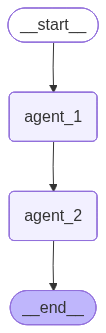

In [20]:
graph = workflow.compile()

print(type(graph))
graph


In [22]:
mermaid_code = graph.get_graph().draw_mermaid()

print(mermaid_code)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	agent_1(agent_1)
	agent_2(agent_2)
	__end__([<p>__end__</p>]):::last
	__start__ --> agent_1;
	agent_1 --> agent_2;
	agent_2 --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [24]:
# Graph
query = "LangGraph는 무엇이며, LangChain과 어떤 차이점이 있나요?"

state = {"query": query}
result = graph.invoke(state)

print(result)



[Agent 1] 원본 질문: LangGraph는 무엇이며, LangChain과 어떤 차이점이 있나요?
[Agent 1] 핵심 키워드: content='핵심 키워드:  \n1. **LangGraph**  \n2. **LangChain**  \n3. **차이점**  \n4. **프레임워크** (또는 **도구**)  \n5. **기능 비교** (선택적)  \n\n*추가 설명*:  \n- "LangGraph"와 "LangChain"은 각각 다른 목적의 프레임워크로, LangGraph는 그래프 기반 워크플로우에 특화된 반면, LangChain은 체인(Chain) 형태의 LLM 애플리케이션 구축에 중점을 둡니다.  \n- "차이점"은 두 기술의 핵심 비교 대상이며, "프레임워크" 또는 "도구"는 이들의 범주를 명확히 하는 키워드입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 40, 'total_tokens': 163, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'solar-pro2-250909', 'system_fingerprint': None, 'id': 'e852b5f6-6fb3-44da-9766-b1de19045b04', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None} id='run--f3629577-2a7f-4766-ba24-a72c7ee706b2-0' usage_metadata={'i

In [25]:
pprint(result)


{'final_answer': AIMessage(content='### LangGraph와 LangChain의 차이점 및 심층 분석\n\n#### 1. **LangGraph란?**\nLangGraph는 **상태(stateful) LLM 애플리케이션**을 구축하기 위한 그래프 기반 프레임워크로, 복잡한 대화 흐름을 체계적으로 관리하는 데 특화되어 있습니다.  \n- **핵심 기능**:  \n  - **상태 관리**: 다중 턴 대화에서 사용자 입력, 중간 결과, 컨텍스트를 JSON 형식의 상태로 유지하며, 노드 간 상태 전달이 가능합니다.  \n  - **그래프 구조**: 노드(작업 단위)와 에지(흐름 제어)로 구성된 시각적 설계를 지원합니다. 예를 들어, 조건 분기(`if-else`), 루프, 병렬 처리 등을 구현할 수 있습니다.  \n  - **LangChain 통합**: LangChain의 체인, 에이전트, 메모리 모듈을 LangGraph 노드에 직접 활용할 수 있어 확장성이 뛰어납니다.  \n- **사용 사례**:  \n  - 다단계 챗봇(예: 주문 → 결제 → 확인), 문서 분석 파이프라인, 게임 로직 구현 등 **상태 유지가 필수적인 시나리오**.\n\n#### 2. **LangChain과의 차이점**\n| **기준**         | **LangChain**                          | **LangGraph**                          |\n|------------------|----------------------------------------|----------------------------------------|\n| **목적**         | LLM 애플리케이션의 **기본 구성 요소** 제공 | **복잡한 대화 흐름** 및 상태 관리 최적화 |\n| **구조**         | 체인(Chain), 에이전트(Agent) 중심       | 그래프(Graph) 기반 흐름 설계            |

In [27]:
pprint(result['final_answer'].content)

('### LangGraph와 LangChain의 차이점 및 심층 분석\n'
 '\n'
 '#### 1. **LangGraph란?**\n'
 'LangGraph는 **상태(stateful) LLM 애플리케이션**을 구축하기 위한 그래프 기반 프레임워크로, 복잡한 대화 흐름을 '
 '체계적으로 관리하는 데 특화되어 있습니다.  \n'
 '- **핵심 기능**:  \n'
 '  - **상태 관리**: 다중 턴 대화에서 사용자 입력, 중간 결과, 컨텍스트를 JSON 형식의 상태로 유지하며, 노드 간 상태 전달이 '
 '가능합니다.  \n'
 '  - **그래프 구조**: 노드(작업 단위)와 에지(흐름 제어)로 구성된 시각적 설계를 지원합니다. 예를 들어, 조건 '
 '분기(`if-else`), 루프, 병렬 처리 등을 구현할 수 있습니다.  \n'
 '  - **LangChain 통합**: LangChain의 체인, 에이전트, 메모리 모듈을 LangGraph 노드에 직접 활용할 수 있어 '
 '확장성이 뛰어납니다.  \n'
 '- **사용 사례**:  \n'
 '  - 다단계 챗봇(예: 주문 → 결제 → 확인), 문서 분석 파이프라인, 게임 로직 구현 등 **상태 유지가 필수적인 시나리오**.\n'
 '\n'
 '#### 2. **LangChain과의 차이점**\n'
 '| **기준**         | **LangChain**                          | '
 '**LangGraph**                          |\n'
 '|------------------|----------------------------------------|----------------------------------------|\n'
 '| **목적**         | LLM 애플리케이션의 **기본 구성 요소** 제공 | **복잡한 대화 흐름** 및 상태 관리 최적화 '
 '|\n'
 '| **구조**         | 체인(Chain), 에이전트(